In [1]:
import pandas as pd

# 读取 CSV 文件
raw_df = pd.read_csv('train.csv')

In [2]:
raw_df.head()

,id,id_str,name,screen_name,location,profile_location,description,url,entities,protected,...,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,label,total_tweets
0,17461978,17461978,SHAQ,SHAQ,"Orlando, FL","{'id': '55b4f9e5c516e0b6', 'url': 'https://api...","VERY QUOTATIOUS, I PERFORM RANDOM ACTS OF SHAQ...",https://t.co/7hsiK8cCKW,{'url': {'urls': [{'url': 'https://t.co/7hsiK8...,False,...,2FC2EF,181A1E,252429,666666,True,False,False,False,0,200
1,1297437077403885568,1297437077403885568,Jennifer Fishpaw,JenniferFishpaw,NaN,NaN,NaN,NaN,{'description': {'urls': []}},False,...,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,1,0
2,17685258,17685258,Brad Parscale,parscale,Florida,NaN,Owner @ Parscale Strategy. Senior Advisor Digi...,https://t.co/GooZcYDqFg,{'url': {'urls': [{'url': 'https://t.co/GooZcY...,False,...,AB2316,FFFFFF,FFFFFF,666666,False,False,False,False,0,200
3,15750898,15750898,FOX 13 Tampa Bay,FOX13News,"Tampa, FL",NaN,Bringing you the important stuff like breaking...,https://t.co/RtP9QYEZCq,{'url': {'urls': [{'url': 'https://t.co/RtP9QY...,False,...,0B2F8A,FFFFFF,E8EEF0,333333,True,False,False,False,0,200
4,1659167666,1659167666,Vonte The Plug 🎤🔌,VonteThePlugNC,"Jacksonville Beach, FL","{'id': '5e281c17a74c170f', 'url': 'https://api...",MOTIVATION 3 OUT NOW 🔥 Singles: ‘Lil Shawdy’ &...,https://t.co/5cY8GWvk8E,{'url': {'urls': [{'url': 'https://t.co/5cY8GW...,False,...,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,False,1,88


In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8278 entries, 0 to 8277
Data columns (total 40 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  8278 non-null   int64  
 1   id_str                              8278 non-null   int64  
 2   name                                8278 non-null   object 
 3   screen_name                         8278 non-null   object 
 4   location                            5874 non-null   object 
 5   profile_location                    728 non-null    object 
 6   description                         7205 non-null   object 
 7   url                                 4028 non-null   object 
 8   entities                            8278 non-null   object 
 9   protected                           8278 non-null   bool   
 10  followers_count                     8278 non-null   int64  
 11  friends_count                       8278 no

In [4]:
# 进行数据分组并计算每种 account_type 的数量
account_counts = raw_df.groupby('label').size().reset_index(name='total')

# 显示结果
print(account_counts)

   label  total
0      0   3632
1      1   4646


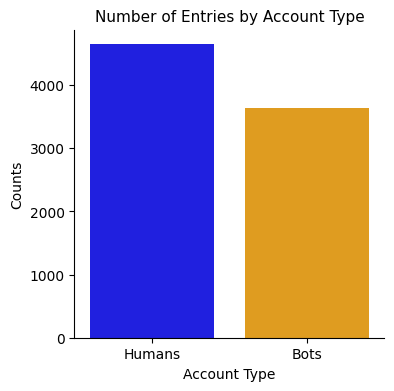

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

num_humans = account_counts.total.values[1]
num_bots = account_counts.total.values[0]
# 创建一个 DataFrame
data = {
    'Account Type': ['Humans', 'Bots'],
    'Counts': [num_humans, num_bots]
}
df = pd.DataFrame(data)

plt.figure(figsize=(4, 4))
# 使用 hue 参数来设置不同的颜色
sns.barplot(x='Account Type', y='Counts', data=df, hue='Account Type', palette=['blue', 'orange'], legend=False)
plt.title("Number of Entries by Account Type", fontsize=11)
sns.despine()

plt.show()  # 显示图形

In [7]:
# 计算每种 account_type 中 verified='true' 的数量
ver = raw_df[raw_df['verified'] == True].groupby('label').size().reset_index(name='ver_true')

# 计算每种 account_type 中 verified='false' 的数量
not_ver = raw_df[raw_df['verified'] == False].groupby('label').size().reset_index(name='ver_false')

# 合并两个 DataFrame
ver_status_by_type = pd.merge(ver, not_ver, on='label', how='outer')

# 显示结果
print(ver_status_by_type)

   label  ver_true  ver_false
0      0      2056       1576
1      1         1       4645


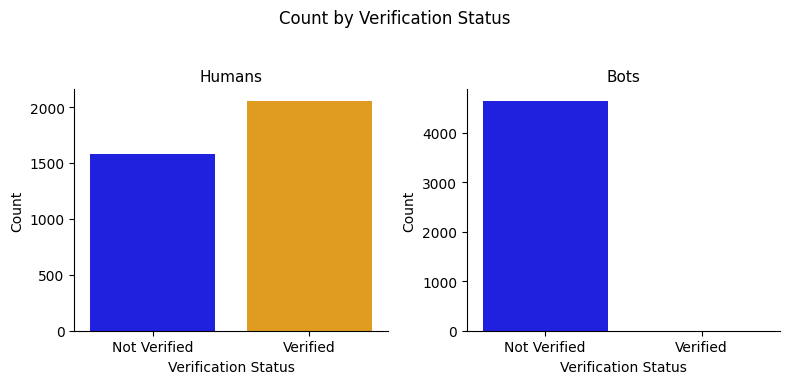

In [8]:
humans_verified = ver_status_by_type.ver_true.values[0]
humans_not_verified = ver_status_by_type.ver_false.values[0]
bots_verified = ver_status_by_type.ver_true.values[1]
bots_not_verified = ver_status_by_type.ver_false.values[1]

types = ['Not Verified', 'Verified']
bot_counts = [bots_not_verified, bots_verified]
human_counts = [humans_not_verified, humans_verified]

# 创建一个 DataFrame 用于 Humans 和 Bots
data_humans = {
    'Verification Status': types,
    'Count': human_counts
}
data_bots = {
    'Verification Status': types,
    'Count': bot_counts
}

df_humans = pd.DataFrame(data_humans)
df_bots = pd.DataFrame(data_bots)

plt.figure(figsize=(8, 4), dpi=100)
plt.suptitle("Count by Verification Status", fontsize=12)

# 绘制 Humans 的柱状图
plt.subplot(1, 2, 1)
sns.barplot(x='Verification Status', y='Count', data=df_humans, palette=['blue', 'orange'], hue='Verification Status', legend=False)
plt.title("Humans", fontsize=11)
plt.ylabel("Count", fontsize=10)
sns.despine()

# 绘制 Bots 的柱状图
plt.subplot(1, 2, 2)
sns.barplot(x='Verification Status', y='Count', data=df_bots, palette=['blue', 'orange'], hue='Verification Status', legend=False)
plt.title("Bots", fontsize=11)
sns.despine()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 调整布局以避免重叠
plt.show()  # 显示图形

In [9]:
# Binary classifications for bots and boolean values
raw_df['default_profile'] = raw_df['default_profile'].astype(int)
raw_df['default_profile'] = raw_df['default_profile'].astype(int)
raw_df['default_profile_image'] = raw_df['default_profile_image'].astype(int)
raw_df['geo_enabled'] = raw_df['geo_enabled'].astype(int)
raw_df['verified'] = raw_df['verified'].astype(int)

# datetime conversion
raw_df['created_at'] = pd.to_datetime(raw_df['created_at'], format='%a %b %d %H:%M:%S %z %Y')
# hour created
raw_df['hour_created'] = pd.to_datetime(raw_df['created_at']).dt.hour

# 创建目标日期
target_date = pd.Timestamp('2020-12-31', tz='UTC')

# 计算 'created_at' 与 'target_date' 之间的天数差，并创建新列 'account_age_days'
raw_df['account_age_days'] = (target_date - raw_df['created_at']).dt.days + 1

# 计算每天发推的数量
raw_df['average_tweets_per_day'] = raw_df['total_tweets'] / raw_df['account_age_days'] 

In [10]:
# usable df setup
df = raw_df[['label', 'created_at', 'hour_created', 'verified', 'geo_enabled', 'default_profile', 
              'default_profile_image', 'favourites_count', 'followers_count', 'friends_count', 'statuses_count',
             'average_tweets_per_day', 'account_age_days']]

del raw_df

In [11]:
df.head()

,label,created_at,hour_created,verified,geo_enabled,default_profile,default_profile_image,favourites_count,followers_count,friends_count,statuses_count,average_tweets_per_day,account_age_days
0,0,2008-11-18 10:27:25+00:00,10,1,1,0,0,142,15349596,692,9798,0.045188,4426
1,1,2020-08-23 07:35:11+00:00,7,0,0,1,0,7,0,44,0,0.000000,130
2,0,2008-11-27 18:47:32+00:00,18,1,1,0,0,953,762839,475,5518,0.045280,4417
3,0,2008-08-06 15:12:10+00:00,15,1,1,0,0,2946,327587,4801,192876,0.044150,4530
4,1,2013-08-10 03:25:35+00:00,3,0,0,1,0,729,13324,647,103,0.032593,2700


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8278 entries, 0 to 8277
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   label                   8278 non-null   int64              
 1   created_at              8278 non-null   datetime64[ns, UTC]
 2   hour_created            8278 non-null   int32              
 3   verified                8278 non-null   int64              
 4   geo_enabled             8278 non-null   int64              
 5   default_profile         8278 non-null   int64              
 6   default_profile_image   8278 non-null   int64              
 7   favourites_count        8278 non-null   int64              
 8   followers_count         8278 non-null   int64              
 9   friends_count           8278 non-null   int64              
 10  statuses_count          8278 non-null   int64              
 11  average_tweets_per_day  8278 non-null   flo

In [13]:
df.describe()

,label,hour_created,verified,geo_enabled,default_profile,default_profile_image,favourites_count,followers_count,friends_count,statuses_count,average_tweets_per_day,account_age_days
count,8278.000000,8278.000000,8278.000000,8278.000000,8278.00000,8278.000000,8278.000000,8.278000e+03,8.278000e+03,8.278000e+03,8278.000000,8278.000000
mean,0.561247,12.896956,0.248490,0.417371,0.49553,0.025006,13297.475477,6.464586e+05,6.609915e+03,2.158684e+04,0.104056,2698.310461
std,0.496265,7.131695,0.432163,0.493155,0.50001,0.156153,40415.682739,4.148888e+06,6.377857e+04,9.008918e+04,0.151922,1423.596291
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,118.000000
25%,0.000000,7.000000,0.000000,0.000000,0.00000,0.000000,146.000000,2.010000e+02,2.310000e+02,4.050000e+02,0.046533,1452.000000
50%,1.000000,14.000000,0.000000,0.000000,0.00000,0.000000,1584.500000,1.939500e+03,7.230000e+02,3.624000e+03,0.056935,3002.000000
75%,1.000000,19.000000,0.000000,1.000000,1.00000,0.000000,9121.250000,3.762050e+04,2.124000e+03,1.572975e+04,0.093259,3992.000000
max,1.000000,23.000000,1.000000,1.000000,1.00000,1.000000,783456.000000,1.124032e+08,4.339982e+06,5.140025e+06,1.680672,5399.000000


In [14]:
import numpy as np

In [15]:
# Interesting features to look at: 
df['avg_daily_followers'] = np.round(df['followers_count'] / df['account_age_days'])
df['avg_daily_friends'] = np.round(df['followers_count'] / df['account_age_days'])
df['avg_daily_favorites'] = np.round(df['followers_count'] / df['account_age_days'])

# Log transformations for highly skewed data
df['friends_log'] = np.round(np.log(1 + df['friends_count']), 3)
df['followers_log'] = np.round(np.log(1 + df['followers_count']), 3)
df['favs_log'] = np.round(np.log(1 + df['favourites_count']), 3)
df['avg_daily_tweets_log'] = np.round(np.log(1+ df['average_tweets_per_day']), 3)

# Possible interaction features
df['network'] = np.round(df['friends_log'] * df['followers_log'], 3)
df['tweet_to_followers'] = np.round(np.log( 1+ df['statuses_count']) * np.log(1+ df['followers_count']), 3)

# Log-transformed daily acquisition metrics for dist. plots
df['follower_acq_rate'] = np.round(np.log(1 + (df['followers_count'] / df['account_age_days'])), 3)
df['friends_acq_rate'] = np.round(np.log(1 + (df['friends_count'] / df['account_age_days'])), 3)
df['favs_rate'] = np.round(np.log(1 + (df['friends_count'] / df['account_age_days'])), 3)

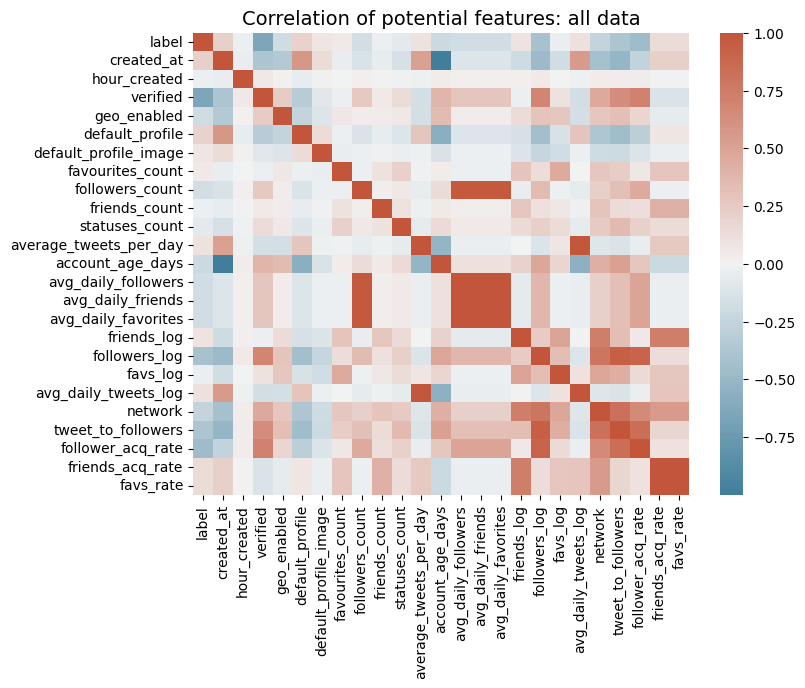

In [16]:
plt.figure(figsize=(8,6), dpi=100)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(df.corr(), cmap=cmap, annot=False)
plt.title('Correlation of potential features: all data', fontsize=14);

In [17]:
bots = df[df['label'] == 1]
humans = df[df['label'] == 0]

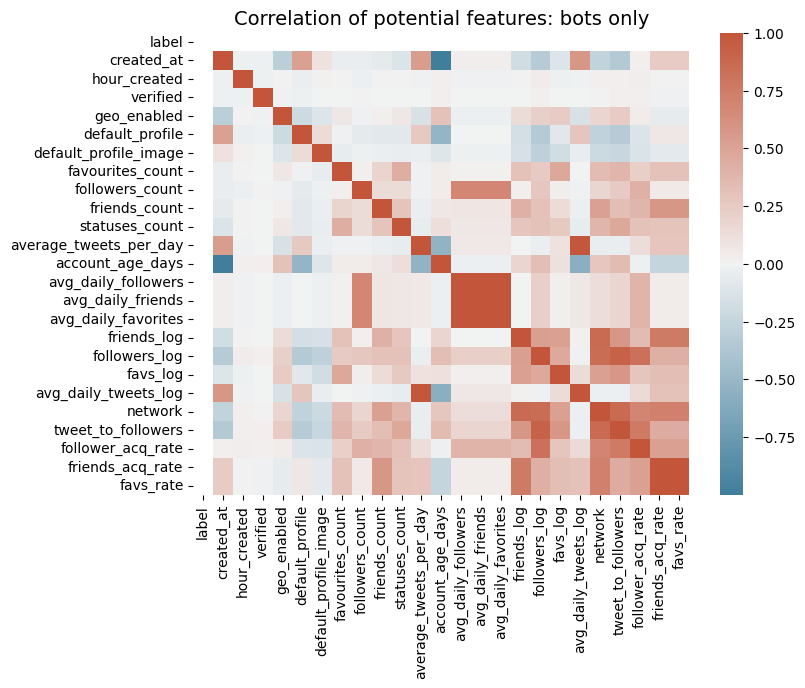

In [18]:
plt.figure(figsize=(8,6), dpi=100)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(bots.corr(), cmap=cmap, annot=False)
plt.title('Correlation of potential features: bots only', fontsize=14);

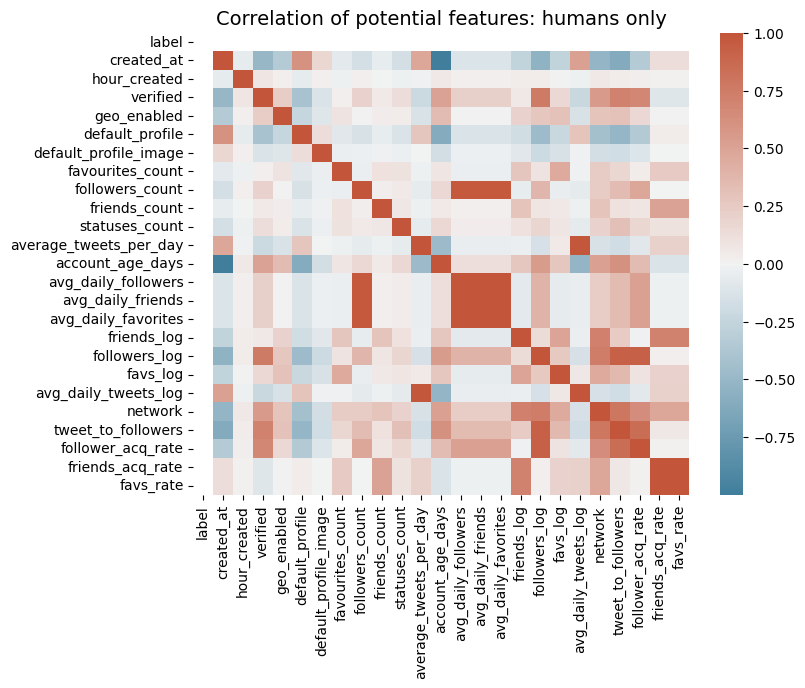

In [19]:
plt.figure(figsize=(8,6), dpi=100)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(humans.corr(), cmap=cmap, annot=False)
plt.title('Correlation of potential features: humans only', fontsize=14);

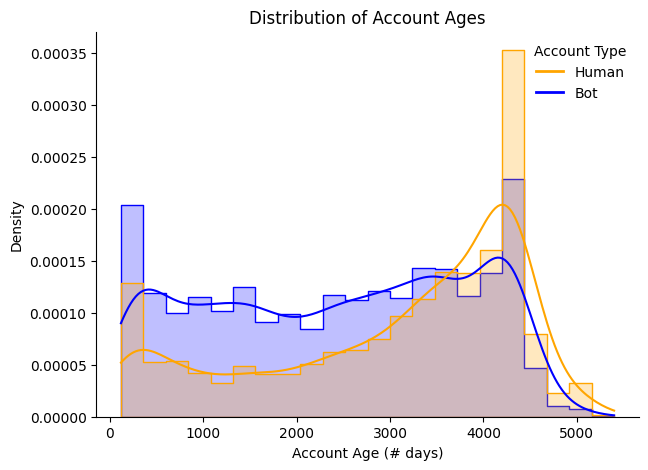

In [21]:
plt.figure(figsize=(7, 5), dpi=100)

# 绘制直方图
sns.histplot(x='account_age_days', data=df, hue='label', alpha=.25, 
             kde=True, stat='density', common_bins=True, element='step', 
             palette={0: 'orange', 1: 'blue'}, legend=False)

# 自定义图例
handles = [
    plt.Line2D([0], [0], color='orange', lw=2, label='Human'),  # 0 对应 Human
    plt.Line2D([0], [0], color='blue', lw=2, label='Bot')       # 1 对应 Bot
]

plt.legend(title='Account Type', handles=handles, loc='upper right', frameon=False)
plt.title('Distribution of Account Ages', fontsize=12)
plt.xlabel('Account Age (# days)', fontsize=10)
plt.ylabel('Density', fontsize=10)
sns.despine()

plt.show()  # 显示图形

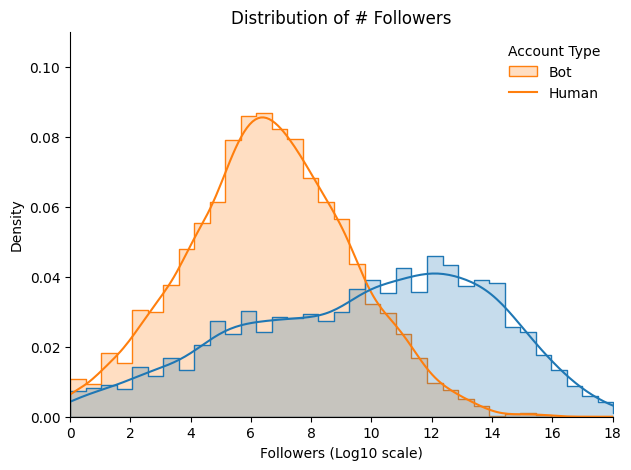

In [29]:
plt.figure(figsize=(7,5), dpi=100)
sns.histplot(x='followers_log', data=df, hue='label', alpha=.25, 
             kde=True, stat='density', common_bins=True, element='step', legend=True)

plt.legend(title='Account Type', loc='upper right', labels=['Bot', 'Human'], frameon=False)
plt.title('Distribution of # Followers', fontsize=12)
plt.xlabel('Followers (Log10 scale)', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xlim(0, 18)
plt.ylim(0, 0.11)
sns.despine();

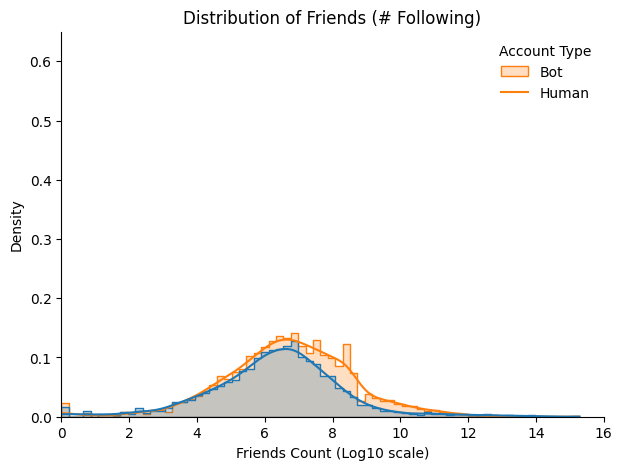

In [31]:
plt.figure(figsize=(7,5), dpi=100)
sns.histplot(x='friends_log', data=df, hue='label', alpha=.25, 
             kde=True, stat='density', common_bins=True, element='step', legend=True)

plt.legend(title='Account Type', loc='upper right', labels=['Bot', 'Human'], frameon=False)
plt.title('Distribution of Friends (# Following)', fontsize=12)
plt.xlabel('Friends Count (Log10 scale)', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xlim(0, 16)
plt.ylim(0, 0.65)
sns.despine();

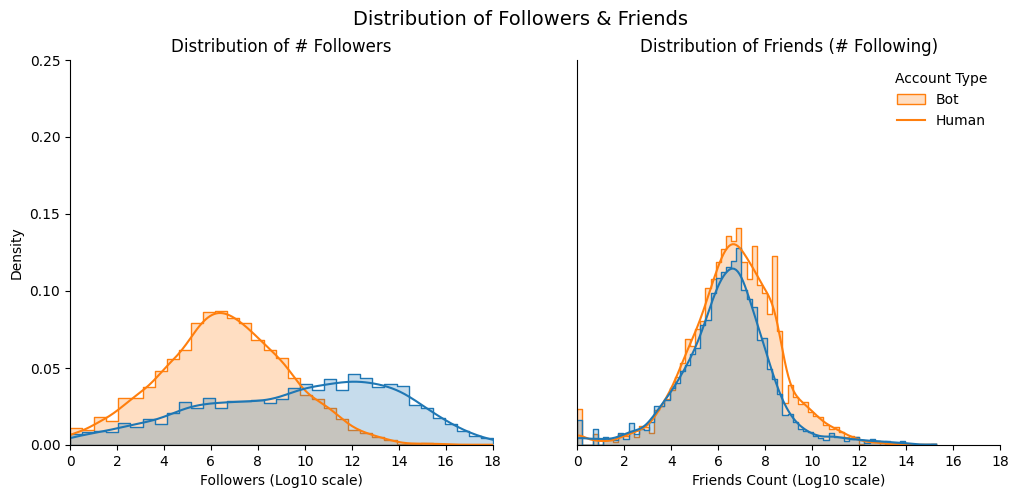

In [34]:
plt.figure(figsize=(12,5), dpi=100)
plt.suptitle('Distribution of Followers & Friends', fontsize=14)

plt.subplot(1, 2, 1)
sns.histplot(x='followers_log', data=df, hue='label', alpha=.25, 
             kde=True, stat='density', common_bins=True, element='step', legend=False)
plt.title('Distribution of # Followers', fontsize=12)
plt.xlabel('Followers (Log10 scale)', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xlim(0, 18)
plt.ylim(0, 0.25)
sns.despine()

plt.subplot(1, 2, 2)
sns.histplot(x='friends_log', data=df, hue='label', alpha=.25, 
             kde=True, stat='density', common_bins=True, element='step', legend=True)

plt.legend(title='Account Type', loc='upper right', labels=['Bot', 'Human'], frameon=False)
plt.title('Distribution of Friends (# Following)', fontsize=12)
plt.xlabel('Friends Count (Log10 scale)', fontsize=10)
plt.ylabel("")
plt.yticks([])
plt.xlim(0, 18)
plt.ylim(0, 0.25)
sns.despine();

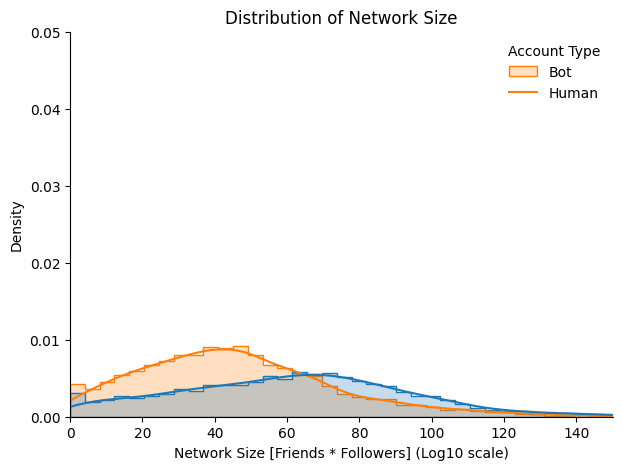

In [35]:
plt.figure(figsize=(7,5), dpi=100)
sns.histplot(x='network', data=df, hue='label', alpha=.25, 
             kde=True, stat='density', common_bins=True, element='step', legend=True)

plt.legend(title='Account Type', loc='upper right', labels=['Bot', 'Human'], frameon=False)
plt.title('Distribution of Network Size', fontsize=12)
plt.xlabel('Network Size [Friends * Followers] (Log10 scale)', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xlim(0, 150)
plt.ylim(0, 0.05)
sns.despine();

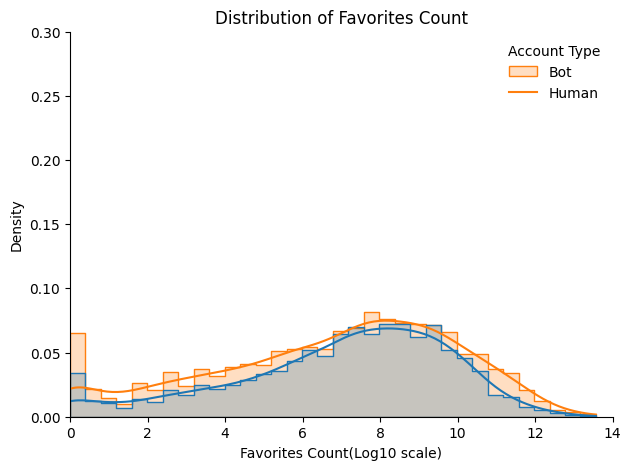

In [36]:
plt.figure(figsize=(7,5), dpi=100)
sns.histplot(x='favs_log', data=df, hue='label', alpha=.25, 
             kde=True, stat='density', common_bins=True, element='step', legend=True)

plt.legend(title='Account Type', loc='upper right', labels=['Bot', 'Human'], frameon=False)
plt.title("Distribution of Favorites Count", fontsize=12)
plt.xlabel('Favorites Count(Log10 scale)', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xlim(0, 14)
plt.ylim(0, 0.3)
sns.despine();

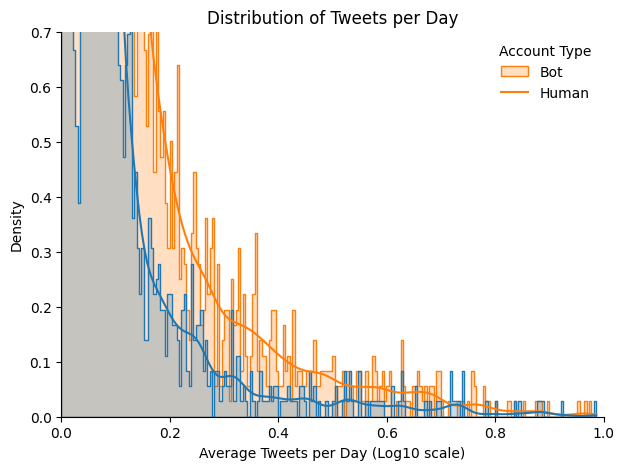

In [38]:
plt.figure(figsize=(7,5), dpi=100)
sns.histplot(x='avg_daily_tweets_log', data=df, hue='label', alpha=.25, 
             kde=True, stat='density', common_bins=True, element='step', legend=True)

plt.legend(title='Account Type', loc='upper right', labels=['Bot', 'Human'], frameon=False)
plt.title("Distribution of Tweets per Day", fontsize=12)
plt.xlabel('Average Tweets per Day (Log10 scale)', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xlim(0, 1)
plt.ylim(0, 0.7)
sns.despine();
#plt.savefig('imgs/tweets_per_day.png');